## Curvilinear Regression on Crop Yield Prediciton

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import regression as reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
data = pd.read_csv("apy.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


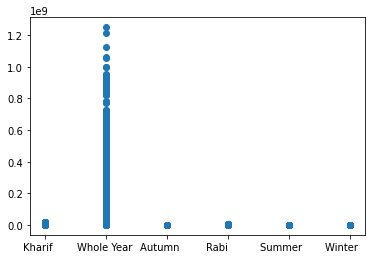

In [5]:
plt.scatter(data['Season'], data['Production'])

In [6]:
data.shape

(246091, 7)

In [7]:
df = data.drop(columns={'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'}, axis=1)
df.dropna(inplace=True)
df.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


<AxesSubplot:xlabel='Area', ylabel='Production'>

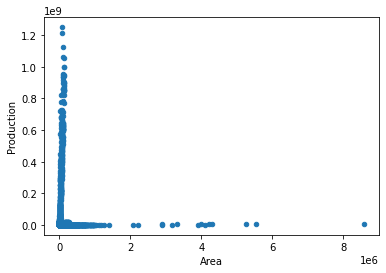

In [8]:
df.plot(kind='scatter', x='Area', y='Production')

<AxesSubplot:xlabel='Area', ylabel='Production'>

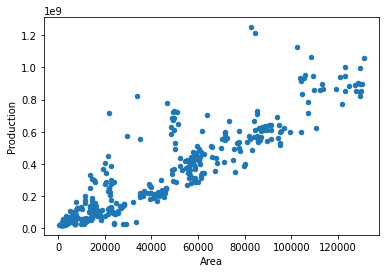

In [9]:
x_end = 0.2e+06
df2 = df[df['Area'] < x_end]
df2 = df2[df2['Production'] > 0.019e+09]
df2.plot(kind='scatter', x='Area', y='Production')

In [23]:
df2['Production'].describe()

count    4.340000e+02
mean     2.941372e+08
std      2.763255e+08
min      1.902900e+07
25%      5.702876e+07
50%      2.015000e+08
75%      4.835000e+08
max      1.250800e+09
Name: Production, dtype: float64

In [10]:
df.shape

(242361, 2)

In [11]:
df2.shape

(434, 2)

In [12]:
((424)/242361)*100

0.17494563894355938

In [44]:
scores = []

In [141]:
x_train, x_test, y_train, y_test = train_test_split(df2['Area'], df2['Production'])
x_train_df, x_test_df = pd.DataFrame(x_train), pd.DataFrame(x_test)

In [142]:
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)   

In [143]:
x_train_df

,Area
101507,84073.00
101917,87177.00
98511,43751.00
99820,52360.00
7829,7229.00
...,...
241972,2895.00
98351,61034.00
99395,57057.00
7985,7045.00


In [144]:
x_train_poly

array([[1.00000000e+00, 8.40730000e+04, 7.06826933e+09],
       [1.00000000e+00, 8.71770000e+04, 7.59982933e+09],
       [1.00000000e+00, 4.37510000e+04, 1.91415000e+09],
       [1.00000000e+00, 5.23600000e+04, 2.74156960e+09],
       [1.00000000e+00, 7.22900000e+03, 5.22584410e+07],
       [1.00000000e+00, 1.13830000e+04, 1.29572689e+08],
       [1.00000000e+00, 6.17190000e+04, 3.80923496e+09],
       [1.00000000e+00, 6.37910000e+04, 4.06929168e+09],
       [1.00000000e+00, 2.99200000e+03, 8.95206400e+06],
       [1.00000000e+00, 8.94720000e+04, 8.00523878e+09],
       [1.00000000e+00, 6.64100000e+03, 4.41028810e+07],
       [1.00000000e+00, 3.22200000e+03, 1.03812840e+07],
       [1.00000000e+00, 5.66750000e+04, 3.21205562e+09],
       [1.00000000e+00, 3.62900000e+03, 1.31696410e+07],
       [1.00000000e+00, 4.82370000e+04, 2.32680817e+09],
       [1.00000000e+00, 1.43580000e+04, 2.06152164e+08],
       [1.00000000e+00, 1.72650000e+04, 2.98080225e+08],
       [1.00000000e+00, 8.54800

In [145]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model = model.fit(x_train_poly, y_train)
coeff = model.coef_
intercept = model.intercept_

In [146]:
coeff

array([0.00000000e+00, 7.00504922e+03, 7.46940993e-04])

Text(0, 0.5, 'Production (tonne)')

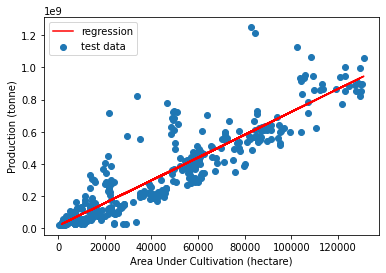

In [162]:
y_pred = intercept
#y_pred = intercept + coeff[1]*x_test + coeff[2]*(x_test**2)
for i in range(deg):
    y_pred += coeff[i+1]*np.power(x_test, i+1)

plt.plot(x_test, y_pred, label='regression', color='r')
plt.scatter(df2['Area'],df2['Production'], label='test data')
#plt.scatter(x_test, y_test, label='test data')
plt.legend()
plt.xlabel("Area Under Cultivation (hectare)")
plt.ylabel("Production (tonne)")

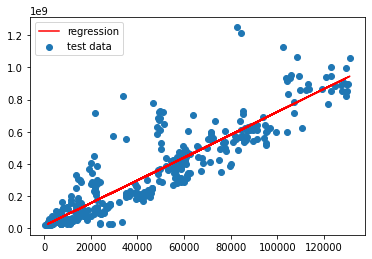

In [148]:
y_pred2 = model.predict(x_test_poly)
plt.plot(x_test, y_pred2, label='regression', color='r')
plt.scatter(df2['Area'],df2['Production'], label='test data')
plt.legend()

In [149]:
model.score(x_test_poly,y_test)
scores.append(model.score(x_test_poly,y_test))

In [150]:
model.score(x_test_poly,y_test)

0.8373279868632785

In [151]:
scores

[0.8499439792023036,
 0.7468368981750211,
 0.8357942254022316,
 0.842522259859045,
 0.8884536439951308,
 0.8733564579874827,
 0.7522903950247589,
 0.8142933486102428,
 0.7812612967595511,
 0.8373279868632785]

In [161]:
import math
sum(scores)/len(scores)

0.8222080491879048